# Exploring results (FA maps) - just age

In [2]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
paramtype = 'FA'
analysis_name='dm_%s_justage'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20170109/', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/dm_MD_noventvol.xls'
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20170109/dm_FA_justage/estimatecontrasts/SPM.mat']


In [4]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_MD_noventvol.xls looking up column FA ...
Analysis name: dm_FA_justage
First column: MD
Columns in the model: [u'Apoe2-3', u'Apoe2-4', u'Apoe3-3', u'Apoe3-4', u'Apoe4-4', u'age23', u'age24', u'age33', u'age34', u'age44', u'agesq23', u'agesq24', u'agesq33', u'agesq34', u'agesq44', u'gender', u'educyears']
Analysis name: dm_FA_justage
Scans (514): [u'/home/grg/spm/MD/10070_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10102_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10108_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10235_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10365_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10419_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10463_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10530_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10551_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10563_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10576_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10630_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10668_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10692_MD_MNI

,contrast name,contrast type,covariate names,covariate weights
0,Main effect Agesq,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 1.0, 0.0, 0.0]"
1,Main effect Agesq,F,"[(Main effect Agesq, T, [Apoe2-3, Apoe2-4, Apo...",None


/home/grg/spm/analysis_20170109/dm_FA_justage/estimatecontrasts/spmT_0001.nii


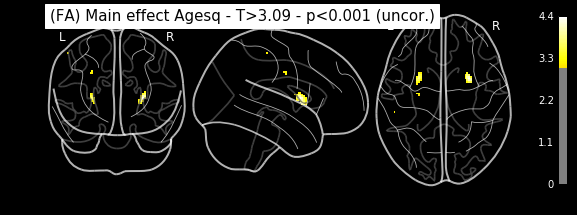

In [7]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(1, 2):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)
    plotting.plot_glass_brain(thresholded_map1,
                      title='(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis_20170109/dm_FA_justage/estimatecontrasts/spmT_0001.nii
Saving to... /tmp/tmpqEhSZR.png


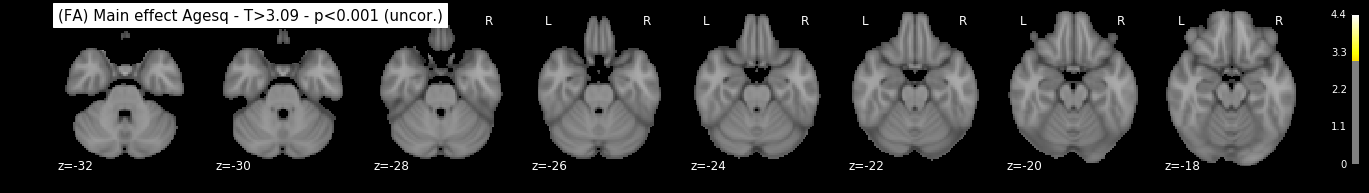

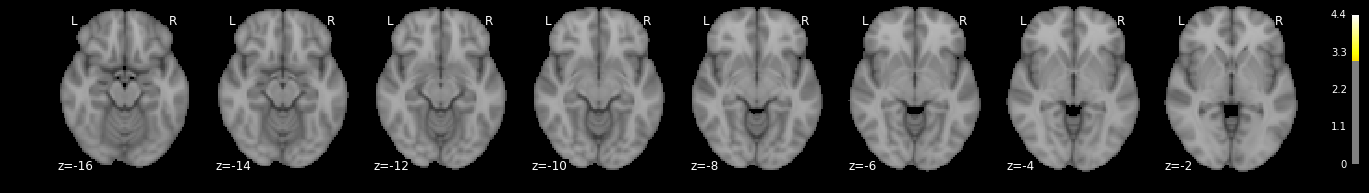

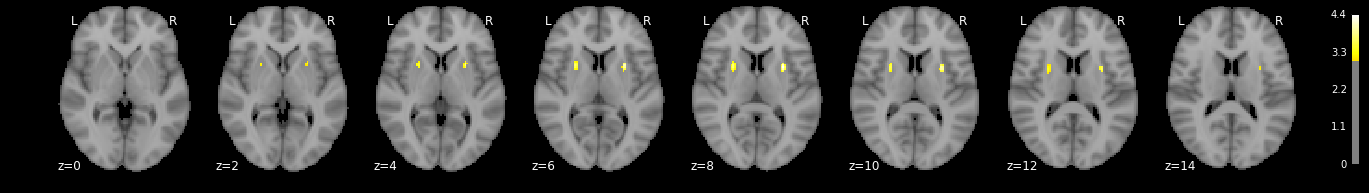

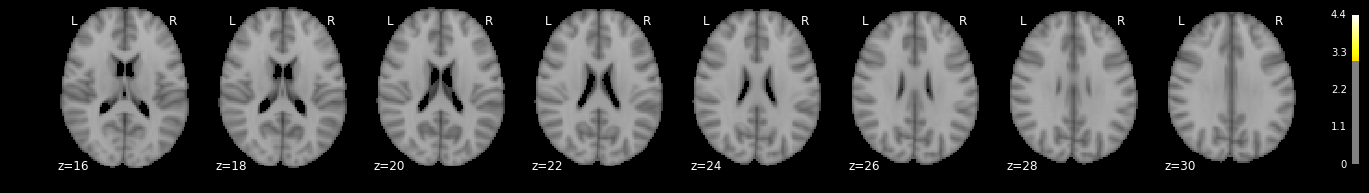

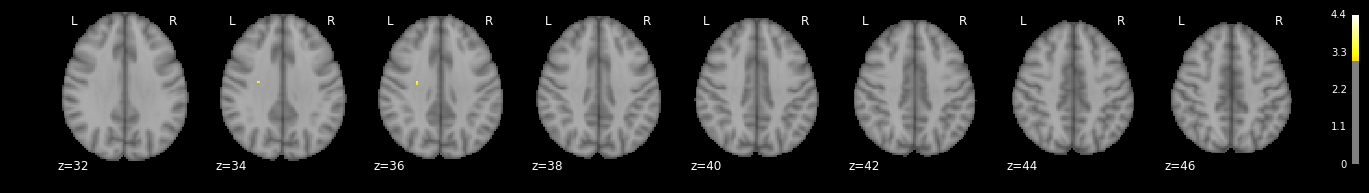

In [8]:
for i in range(1, 2):
    img = osp.join(analysis_wd, 'estimatecontrasts/spmT_00%02d.nii'%i)
    print img
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=0)

    plot_stat_map(thresholded_map1, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - T>%.02f - p<0.001 (uncor.)'%(paramtype, contrast_name, threshold1))
        
plotting.show()

In [6]:
sys.path.append('/home/grg/git/pyAAL/')
import pyAAL
reload(pyAAL)
print spm_mat_file

out = pyAAL.pyAAL(spm_mat_file, 6, mode=2)
pyAAL.to_dataframe(out)

/tmp/test3/dm_MD_noventvol/estimatecontrasts/SPM.mat
creating tempfile /tmp/tmpDrFbJM.m
matlab -nodisplay -nodesktop -nosplash -nojvm -r "addpath('/tmp/test3/dm_MD_noventvol/estimatecontrasts');run('/tmp/tmpDrFbJM');quit"

Contrast: C<NC


,"x,y,z {mm}",nom du label,% Cluster,Nb Vx Cluster,% Label,Nb Vx Label,
0,-14 16 -14,Olfactory_L,52.95,848,160.36,280,
1,-14 16 -14,Olfactory_R,13.21,848,38.75,289,
2,-14 16 -14,Rectus_R,12.85,848,14.63,745,
3,-14 16 -14,OFCmed_R,7.90,848,10.79,621,
4,-14 16 -14,OFCmed_L,5.31,848,8.18,550,
5,-14 16 -14,Caudate_R,2.59,848,2.21,994,
6,-14 16 -14,Frontal_Med_Orb_L,1.77,848,2.09,719,
7,-14 16 -14,OFCpost_R,1.30,848,1.96,561,
8,-14 16 -14,Thalamus_L,0.94,848,0.73,1100,
9,-14 16 -14,OFCpost_L,0.35,848,0.53,567,


Saving to... /tmp/tmp8imfQ9.png


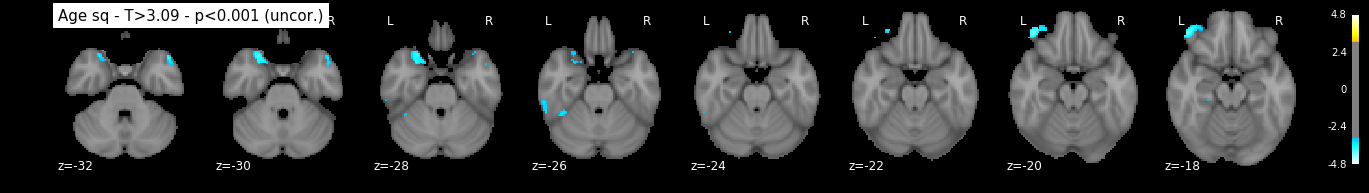

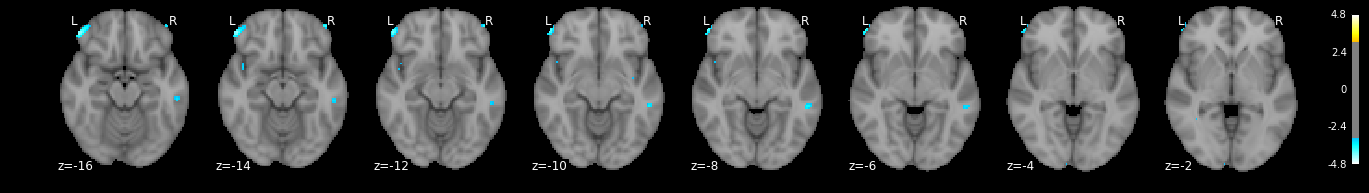

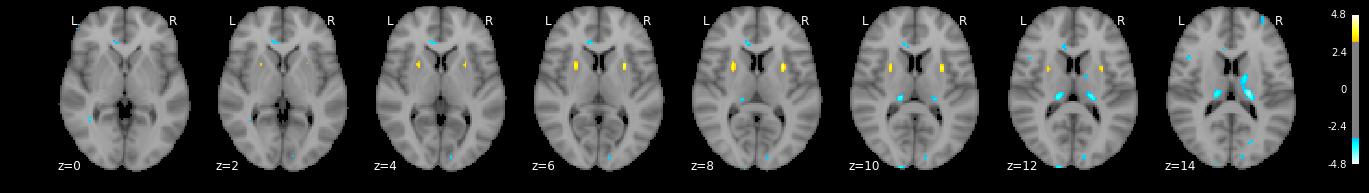

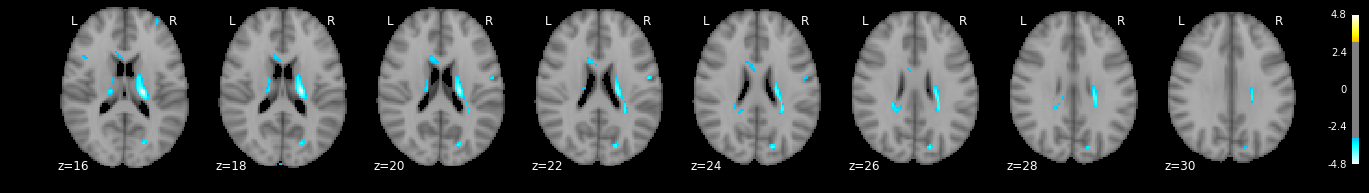

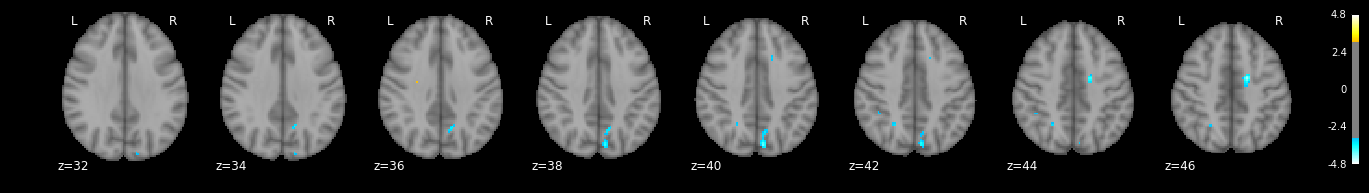

In [14]:
img = '/home/grg/spm/analysis_20170109/dm_FA_justage/modeldesign/spmT_0002.nii'
thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)
plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= 'Age sq - T>%.02f - p<0.001 (uncor.)'%threshold1)

Saving to... /tmp/tmpDX7wIF.png


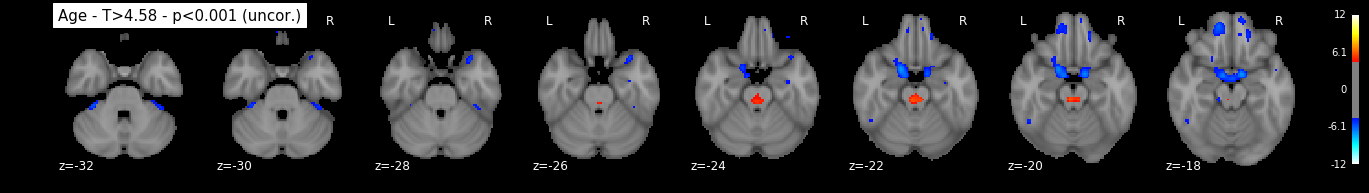

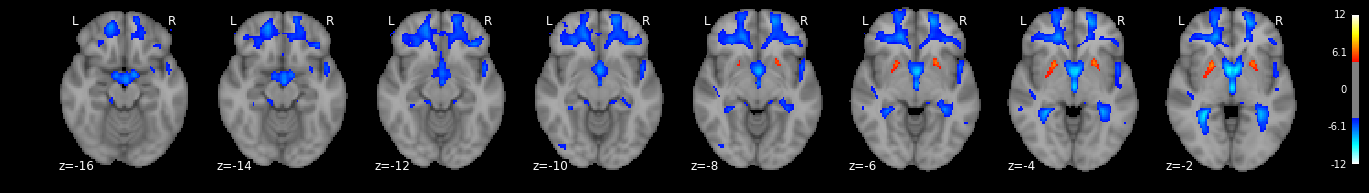

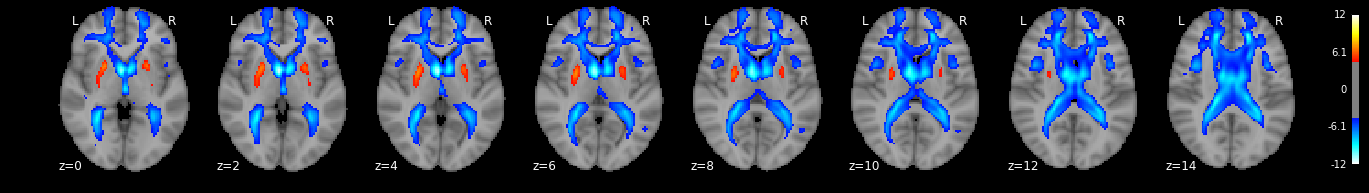

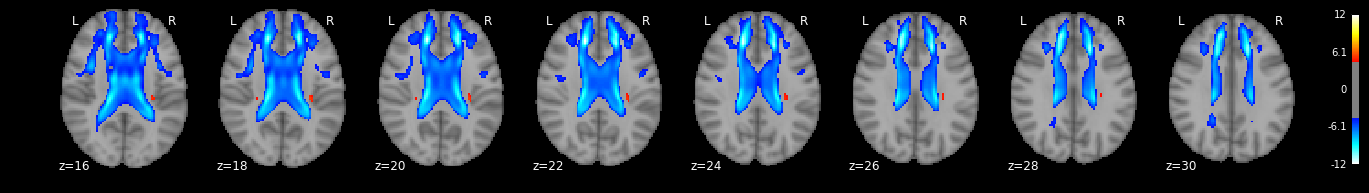

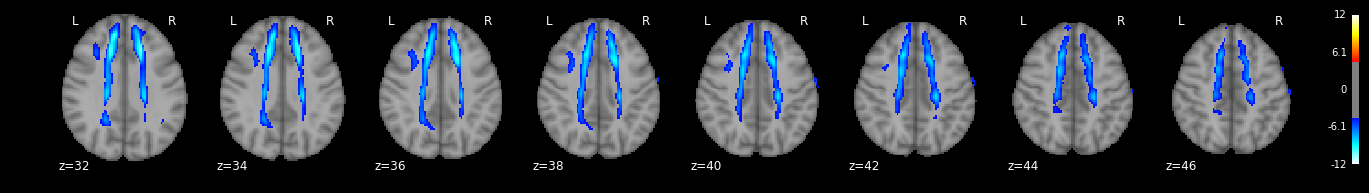

In [21]:
img = '/home/grg/spm/analysis_20170109/dm_FA_justage/estimatecontrasts/spmT_0001.nii'
thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10, height_control='fdr')
plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= 'Age - T>%.02f - p<0.001 (uncor.)'%threshold1)

Saving to... /tmp/tmpq1bxW4.png


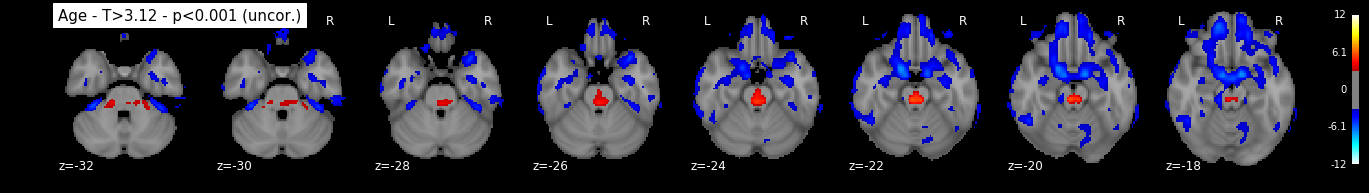

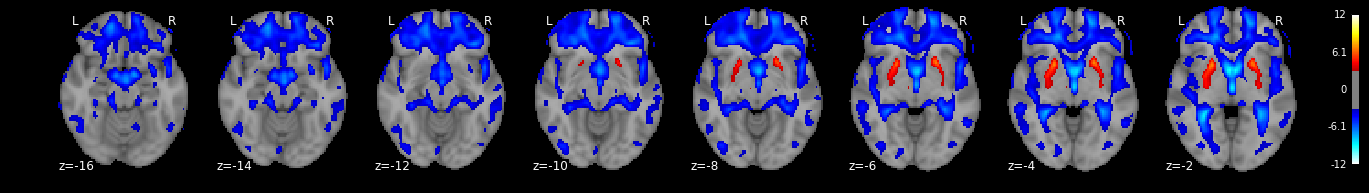

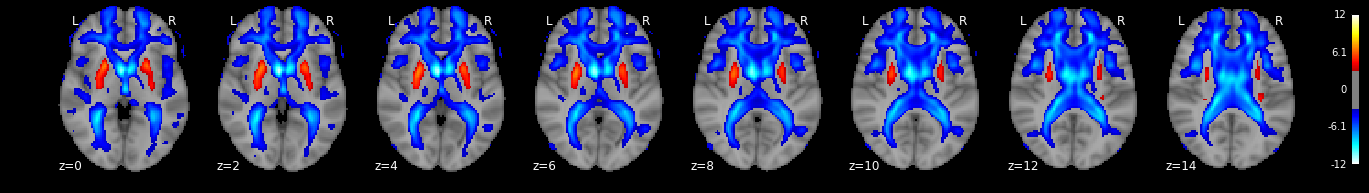

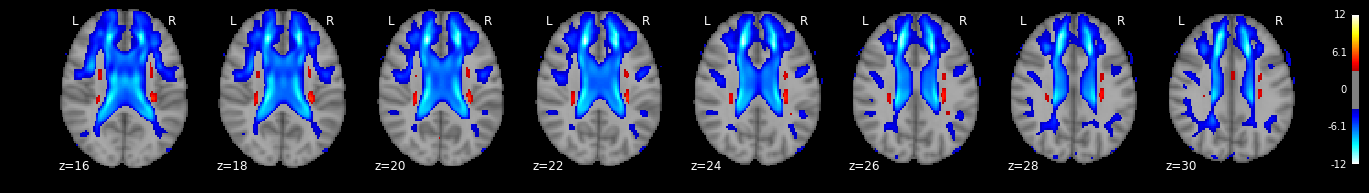

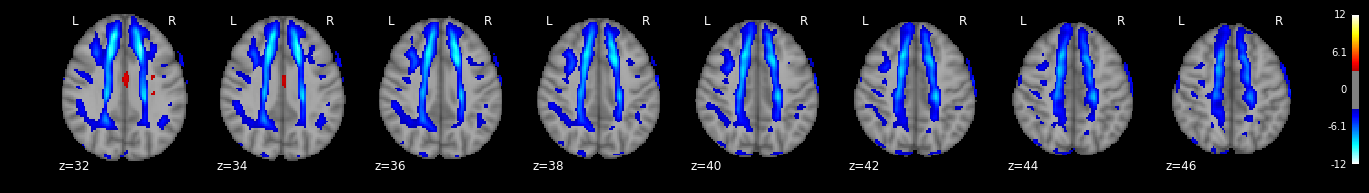

In [25]:
img = '/home/grg/spm/analysis_20170116/dm_FA_justage/estimatecontrasts/spmT_0001.nii'

thresholded_map1, threshold1 = map_threshold(img, threshold=0.05, cluster_threshold=10, height_control='fdr')
plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= 'Age - T>%.02f - p<0.001 (uncor.)'%threshold1)